# Global Life Expectancy Predictions Based on Sustainability Metrics
## Exploratory Data Analysis and Data Preparation

June 23, 2023 | Seamus Walsh and Daniel Gieseke

Life expectancies vary over countries globally.  With this project we are aiming to create a model that will predict a country's life expectancy at birth based on a variety of factors.  Not only is this project focused on building a strong predictive model, this project further aims to look into which country features prove to be the most important when considering life expectancy at birth.  This data was sourced from The World Bank and the United Nations via Kaggle.

Data Source: https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv

### Importing our Libraries and Data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WorldSustainabilityDataset.csv')

In [3]:
df.head()

Country Name Country Code  Year  \
0        Aruba          ABW  2000   
1        Aruba          ABW  2001   
2        Aruba          ABW  2002   
3        Aruba          ABW  2003   
4        Aruba          ABW  2004   

   Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
0                                          91.660398          
1                                         100.000000          
2                                         100.000000          
3                                         100.000000          
4                                         100.000000          

   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG  \
0                                                NaN                                  
1                                                NaN                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                NaN                                  

   Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS  \
0                                          15.392211                                            
1                                          11.491930                                            
2                                           3.893620                                            
3                                           6.713863                                            
4                                           9.801576                                            

   Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS  \
0                                           2.389134                        
1                                           2.509046                        
2                                           2.721385                        
3                                           2.733676                        
4                                           2.678363                        

   Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS  \
0                                           0.000190                              
1                                           0.000214                              
2                                           0.000223                              
3                                           0.000243                              
4                                           0.000256                              

   Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS  \
0                                           0.000190                       
1                                           0.000214                       
2                                           0.000223                       
3                                           0.000243                       
4                                           0.000256                       

   Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

   ...  Gini index (World Bank estimate) - SI.POV.GINI  \
0  ...                                             NaN   
1  ...                                             NaN   
2  ...                                             NaN   
3  ...                                             NaN   
4  ...                                             NaN   

   Income Classification (W

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 54 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Country Name                                                                                  3287 non-null   object 
 1   Country Code                                                                                  3287 non-null   object 
 2   Year                                                                                          3287 non-null   int64  
 3   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      3193 non-null   float64
 4   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG              2566 non-null   float64
 5   Adjusted net savings, exclu

### Creating a "High Life Expectancy" Column
Below we are creating a classifer column titled "High Life Expectancy" and exploring the distribution and mean value of life expectancies at birth across countries.  This column indicates if the Life Expectancy at Birth in a country exceeds 70 years.  We are choosing 70 as it is the mean "Life Expectancy at Birth" in our dataset.  This column will be the 'target' of our model, meaning we aim to create a model that will predict whether a country's life expectancy at birth for a given year exceeds 70 years old.

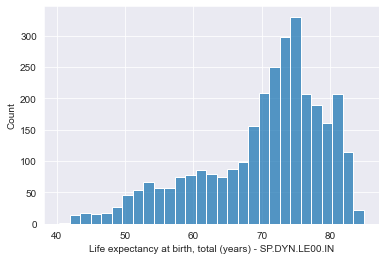

In [5]:
sns.histplot(data=df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN']);

In [6]:
df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN'].mean()

70.1600975609756

In [7]:
df['High_Life_Expectancy'] = np.where(df['Life expectancy at birth, total (years) - SP.DYN.LE00.IN'] >= 70, 1, 0)
df['High_Life_Expectancy'].value_counts()

High_Life_Expectancy
1    1932
0    1355
Name: count, dtype: int64

### Data Preparation: Removing Null Values
Through quickly looking through the stats above, we can ascertain that this dataset includes several columns with a large amount of null values.  Given this insight, we will be wary of this fact and limit our features to those not missing many null values (so we do not limit our dataset too much, or make later imputations that falsely skew our data).  Below we analyze whether a column is missing under 200 values, and drop nulls if this is the case.  We plan to limit our model to these features; luckily we believe these features will prove to be strong predictors in our model.

In [8]:
df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].isna().value_counts()

GDP per capita (current US$) - NY.GDP.PCAP.CD
False    3246
True       41
Name: count, dtype: int64

In [9]:
df = df[df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].notna()]

In [10]:
df['Access to electricity (% of population) - EG.ELC.ACCS.ZS'].isna().value_counts()

Access to electricity (% of population) - EG.ELC.ACCS.ZS
False    3161
True       85
Name: count, dtype: int64

In [11]:
df = df[df['Access to electricity (% of population) - EG.ELC.ACCS.ZS'].notna()]

In [12]:
df['Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS'].isna().value_counts()

Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS
False    3020
True      141
Name: count, dtype: int64

In [13]:
df = df[df['Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS'].notna()]

In [14]:
df['Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS'].isna().value_counts()

Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS
False    3008
True       12
Name: count, dtype: int64

In [15]:
df = df[df['Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS'].notna()]

In [16]:
df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].isna().value_counts()

GDP per capita (current US$) - NY.GDP.PCAP.CD
False    3008
Name: count, dtype: int64

In [17]:
df = df[df['GDP per capita (current US$) - NY.GDP.PCAP.CD'].notna()]

In [18]:
df['Urban population (% of total population) - SP.URB.TOTL.IN.ZS'].isna().value_counts()

Urban population (% of total population) - SP.URB.TOTL.IN.ZS
False    2865
True      143
Name: count, dtype: int64

In [19]:
df = df[df['Urban population (% of total population) - SP.URB.TOTL.IN.ZS'].notna()]

In [20]:
df['Year'].isna().value_counts()

Year
False    2865
Name: count, dtype: int64

In [21]:
df = df[df['Year'].notna()]

In [22]:
df['Rural population (% of total population) - SP.RUR.TOTL.ZS'].isna().value_counts()

Rural population (% of total population) - SP.RUR.TOTL.ZS
False    2865
Name: count, dtype: int64

In [23]:
df = df[df['Rural population (% of total population) - SP.RUR.TOTL.ZS'].notna()]

### Feature Engineering
There are a few columns within our dataset that include ordinal and categorical data.  Below we are creating dummy columns for these columns so we can include them in our model.  This data is largely geographic, which we believe has a large impact on life expectancy at birth.

In [24]:
dummies = pd.get_dummies(df['Continent'])
df = pd.concat([df, dummies], axis=1)

In [25]:
dummies = pd.get_dummies(df['World Regions (UN SDG Definition)'])
df = pd.concat([df, dummies], axis=1)

In [26]:
dummies = pd.get_dummies(df['Income Classification (World Bank Definition)'])
df = pd.concat([df, dummies], axis=1)

In [27]:
dummies = pd.get_dummies(df['Regime Type (RoW Measure Definition)'])
df = pd.concat([df, dummies], axis=1)
df.head()

Country Name Country Code  Year  \
20       Angola          AGO  2001   
21       Angola          AGO  2002   
22       Angola          AGO  2003   
23       Angola          AGO  2004   
24       Angola          AGO  2005   

    Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
20                                          20.000000          
21                                          26.383869          
22                                          27.465635          
23                                          28.536760          
24                                          29.596224          

    Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG  \
20                                          18.457388                                  
21                                          37.239379                                  
22                                           6.421468                                  
23                                          -8.470402                                  
24                                           7.704993                                  

    Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS  \
20                                         -21.156996                                            
21                                           5.021282                                            
22                                           5.148920                                            
23                                          -1.547946                                            
24                                           1.694223                                            

    Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS  \
20                                           2.560090                        
21                                           1.869649                        
22                                           1.182633                        
23                                           1.966160                        
24                                           1.352846                        

    Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS  \
20                                          29.555094                              
21                                          18.789640                              
22                                          15.722121                              
23                                          29.984685                              
24                                          36.249946                              

    Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS  \
20                                                0.0                       
21                                                0.0                       
22                                                0.0                       
23                                                0.0                       
24                                                0.0                       

    Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS  \
20                                           1.886837                              
21                                           1.552627                              
22                                           1.511743                              
23                                           1.426805                              
24                                           1.238411                              

    ...  Oceania  Sub-Saharan Africa  High income  Low income  \
20  ...    False                True        False        True   
21  ...    False                True        False        True   
22  ...    False                True        False        True   
23  ...    False                True        False       False   
24  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2865 entries, 20 to 3286
Data columns (total 76 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Country Name                                                                                  2865 non-null   object 
 1   Country Code                                                                                  2865 non-null   object 
 2   Year                                                                                          2865 non-null   int64  
 3   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      2865 non-null   float64
 4   Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG              2383 non-null   float64
 5   Adjusted net savings, excluding

### Mapping Out Correlation by Feature
Finally, we are mapping out our features of interest by correlation to Life Expectancy at Birth.  Note, this visualization includes the correlation between columns with discrete data as our boolean columns may not provide the most insight here.  From the below visualization, we see that 'Access to Electricity' and 'Particulate Emission Damage' are the two features that are the most correlated to Life Expectancy at Birth.

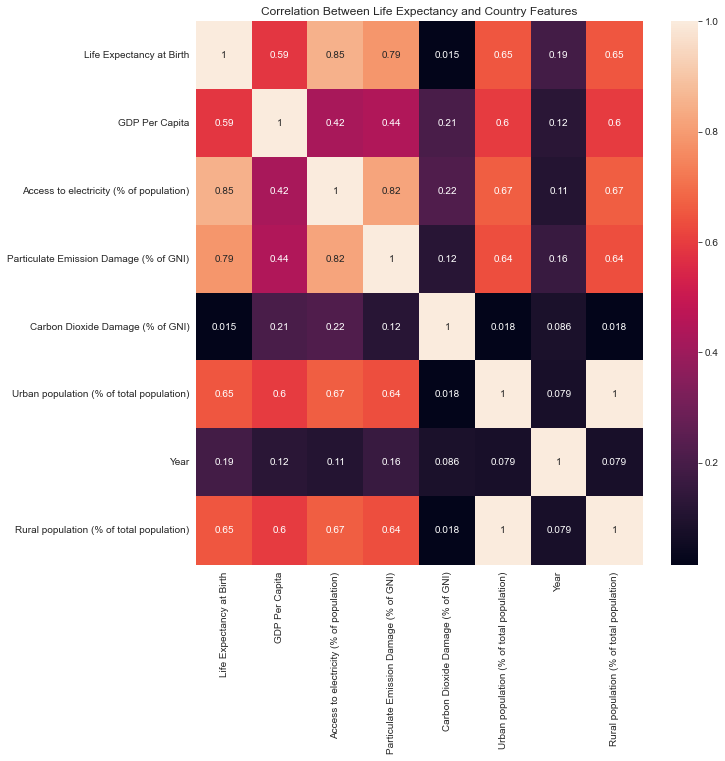

In [29]:
corr_df = df[['Life expectancy at birth, total (years) - SP.DYN.LE00.IN', 
              'GDP per capita (current US$) - NY.GDP.PCAP.CD', 
              'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
              'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS', 
              'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS', 
              'Urban population (% of total population) - SP.URB.TOTL.IN.ZS', 'Year',
              'Rural population (% of total population) - SP.RUR.TOTL.ZS']]
corr_df = corr_df.rename(columns={'Life expectancy at birth, total (years) - SP.DYN.LE00.IN': 'Life Expectancy at Birth', 
                   'GDP per capita (current US$) - NY.GDP.PCAP.CD': 'GDP Per Capita', 
                   'Access to electricity (% of population) - EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
                   'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS': 'Particulate Emission Damage (% of GNI)',
                   'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS': 'Carbon Dioxide Damage (% of GNI)',
                  'Urban population (% of total population) - SP.URB.TOTL.IN.ZS': 'Urban population (% of total population)',
                   'Rural population (% of total population) - SP.RUR.TOTL.ZS': 'Rural population (% of total population)',})
corr_df = corr_df.dropna()

plt.figure(figsize=(10,10))
sns.heatmap(abs(corr_df.corr()), annot=True).set(Title="Correlation Between Life Expectancy and Country Features");

### Saving our Cleaned Data to .CSV for Cleaning

In [30]:
y = df['High_Life_Expectancy']
X = df[['GDP per capita (current US$) - NY.GDP.PCAP.CD',  'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS', 
        'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS', 
        'Urban population (% of total population) - SP.URB.TOTL.IN.ZS', 'Year',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS', 'Africa', 'Asia', 'Europe', 'North America', 
        'South America', 'High income', 'Low income', 'Lower-middle income', 'Upper-middle income', 'Closed Autocracy', 
        'Electoral Autocracy', 'Electoral Democracy', 'Liberal Democracy', 'Eastern and South-Eastern Asia', 
        'Europe and Northern America', 'Latin America and Caribbean', 'Northern Africa and Western Asia', 
        'Sub-Saharan Africa']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [32]:
# Build a pipeline with StandardScaler and Logistic Regression
scaled_pipeline_1 = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 42))])

In [33]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
print(scaled_pipeline_1.score(X_train, y_train))
scaled_pipeline_1.score(X_test, y_test)

0.9301675977653632


0.9246336357292394

In [34]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state = 42))])


In [35]:
# Fit the training data to pipeline
scaled_pipeline_2.fit(X_train, y_train)

# Print the accuracy on test set
print(scaled_pipeline_2.score(X_train, y_train))
scaled_pipeline_2.score(X_test, y_test)

1.0


0.9741800418702024

In [37]:
# Define the grid
grid = [{'RF__max_depth': [2, 14, 15, 16, 17, 18], 
         'RF__min_samples_split': [2, 3], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [38]:
# Define a grid search
gridsearch = GridSearchCV(estimator = scaled_pipeline_2, param_grid = grid, scoring = 'accuracy', cv = 5)


In [39]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
print(gridsearch.score(X_train, y_train))
gridsearch.score(X_test, y_test)

1.0


0.9741800418702024

In [40]:
best_params = gridsearch.best_params_
print(best_params)

{'RF__max_depth': 16, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}


In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access the Random Forest Classifier from the pipeline
rf_classifier = scaled_pipeline_2.named_steps['RF']

# Visualize the first tree in the Random Forest
plt.figure(figsize=(300, 200))
tree_idx = 0  # Index of the tree to visualize
tree = rf_classifier.estimators_[tree_idx]
plt.title(f"Random Forest Tree {tree_idx+1}")
_ = plot_tree(tree, filled=True)

# Show the plot
plt.show()

In [42]:
# Finding the features with the most importance
importances = scaled_pipeline_2.named_steps['RF'].feature_importances_

# Create a list of tuples with feature names and importances
feature_importances = [(feature, importance) for feature, importance in zip(X.columns, importances)]
feature_importances

[('GDP per capita (current US$) - NY.GDP.PCAP.CD', 0.11735351928861429),
 ('Access to electricity (% of population) - EG.ELC.ACCS.ZS',
  0.1622328299960107),
 ('Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
  0.29880074736637635),
 ('Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
  0.04684916615757442),
 ('Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
  0.06986296057272585),
 ('Year', 0.01738698682706306),
 ('Rural population (% of total population) - SP.RUR.TOTL.ZS',
  0.06001985000494992),
 ('Africa', 0.028460590922036937),
 ('Asia', 0.003725296689984797),
 ('Europe', 0.011109324977586616),
 ('North America', 0.005222103065580524),
 ('South America', 0.0015266115195273074),
 ('High income', 0.0156688905076473),
 ('Low income', 0.019926832293284187),
 ('Lower-middle income', 0.01346280442171931),
 ('Upper-middle income', 0.005392021749938546),
 ('Closed Autocracy', 0.0038954055525462854),
 ('Electoral Autocrac

In [43]:


# Assuming your pipeline is named scaled_pipeline_2
y_pred = scaled_pipeline_2.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[537  16]
 [ 21 859]]


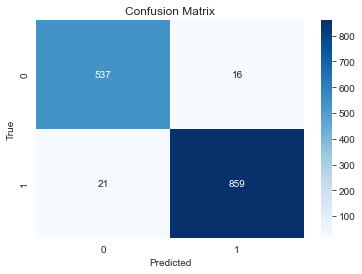

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your pipeline is named scaled_pipeline_2
y_pred = scaled_pipeline_2.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()